In [24]:
import sys
!"{sys.executable}" -m pip install xgboost


In [25]:
import sys
!"{sys.executable}" -m pip install lightgbm


In [26]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.combine import SMOTEENN

In [27]:
df = pd.read_csv(r"C:\Users\DT 2003\Downloads\cleaned_data.csv", low_memory=False)

df.columns = df.columns.str.strip()

print("Missing values:\n", df.isnull().sum())

Missing values:
 ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
Patient Sex_Female           0
Patient Sex_Male             0
Age Group                    0
dtype: int64


In [28]:
df = df.drop(columns=["ID", "filepath", "filename", "Left-Fundus", "Right-Fundus",
                      "Left-Diagnostic Keywords", "Right-Diagnostic Keywords"])

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr = df[numeric_cols].corr()

print(corr)

                    Patient Age         N         D         G         C  \
Patient Age            1.000000 -0.066686 -0.147883  0.124624  0.239715   
N                     -0.066686  1.000000 -0.417034 -0.190987 -0.209454   
D                     -0.147883 -0.417034  1.000000 -0.106180 -0.086253   
G                      0.124624 -0.190987 -0.106180  1.000000 -0.079016   
C                      0.239715 -0.209454 -0.086253 -0.079016  1.000000   
A                      0.039361 -0.163659 -0.105882 -0.027697 -0.080383   
H                     -0.096756 -0.115095  0.036883 -0.001225 -0.033221   
M                      0.060499 -0.155841 -0.078862 -0.031697 -0.076543   
O                     -0.021433 -0.413514  0.022308 -0.042462 -0.106135   
Patient Sex_Female     0.033982 -0.043730 -0.020145 -0.022522  0.050561   
Patient Sex_Male      -0.033982  0.043730  0.020145  0.022522 -0.050561   

                           A         H         M         O  \
Patient Age         0.039361 -0.09675

In [29]:
numeric_cols = ['Patient Age', 'N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)

In [30]:
df

,Patient Age,Patient Sex,N,D,G,C,A,H,M,O,labels,target,Patient Sex_Female,Patient Sex_Male,Age Group
0,0.950134,Female,0,0,0,1,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1,0,Young
1,0.182663,Male,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",0,1,Young
2,0.182663,Female,0,1,0,0,0,0,0,1,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",1,0,Young
3,0.097388,Male,1,0,0,0,0,0,0,0,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0,1,Young
4,1.035409,Male,0,0,0,0,0,0,0,1,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0,1,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,0.353212,Female,0,0,0,0,0,0,0,1,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0,1,Young
1722,1.547056,Male,0,0,0,0,0,0,0,1,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0,1,Young
1723,0.864860,Female,0,0,0,0,0,0,0,1,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0,1,Young
1724,0.097388,Female,0,0,0,0,0,0,0,1,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",1,0,Young


In [31]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if df['target'].dtype in ['int64', 'float64']:
    numeric_cols.append('target')


df['target'] = df['target'].apply(lambda x: eval(x)[0])  

In [32]:
df

,Patient Age,Patient Sex,N,D,G,C,A,H,M,O,labels,target,Patient Sex_Female,Patient Sex_Male,Age Group
0,0.950134,Female,0,0,0,1,0,0,0,0,['N'],1,1,0,Young
1,0.182663,Male,0,1,0,0,0,0,0,1,['D'],0,0,1,Young
2,0.182663,Female,0,1,0,0,0,0,0,1,['D'],0,1,0,Young
3,0.097388,Male,1,0,0,0,0,0,0,0,['N'],1,0,1,Young
4,1.035409,Male,0,0,0,0,0,0,0,1,['N'],1,0,1,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,0.353212,Female,0,0,0,0,0,0,0,1,['N'],1,0,1,Young
1722,1.547056,Male,0,0,0,0,0,0,0,1,['N'],1,0,1,Young
1723,0.864860,Female,0,0,0,0,0,0,0,1,['N'],1,0,1,Young
1724,0.097388,Female,0,0,0,0,0,0,0,1,['O'],0,1,0,Young


Column: Patient Age, Unique Values: [0.95013419 0.1826627  0.09738809 1.0354088  0.01211348 1.54705646
 1.46178185 0.43848653 0.35321192 0.52376114 0.26793731 0.86485958
 2.65562639 0.69431036 0.77958497 0.60903575 1.37650724 1.8881549
 1.20595802 1.71760568 1.12068341 1.29123263 1.80288029 2.05870412
 2.48507717 1.63233107 1.97342951 2.22925334 2.14397873 2.82617561
 2.31452795 2.57035178 2.39980256]
Column: Patient Sex, Unique Values: ['Female' 'Male']
Column: N, Unique Values: [0 1]
Column: D, Unique Values: [0 1]
Column: G, Unique Values: [0 1]
Column: C, Unique Values: [1 0]
Column: A, Unique Values: [0 1]
Column: H, Unique Values: [0 1]
Column: M, Unique Values: [0 1]
Column: O, Unique Values: [0 1]
Column: labels, Unique Values: ["['N']" "['D']" "['M']" "['O']" "['C']" "['H']" "['A']" "['G']"]
Column: target, Unique Values: [1 0]
Column: Patient Sex_Female, Unique Values: [1 0]
Column: Patient Sex_Male, Unique Values: [0 1]
Column: Age Group, Unique Values: ['Young']


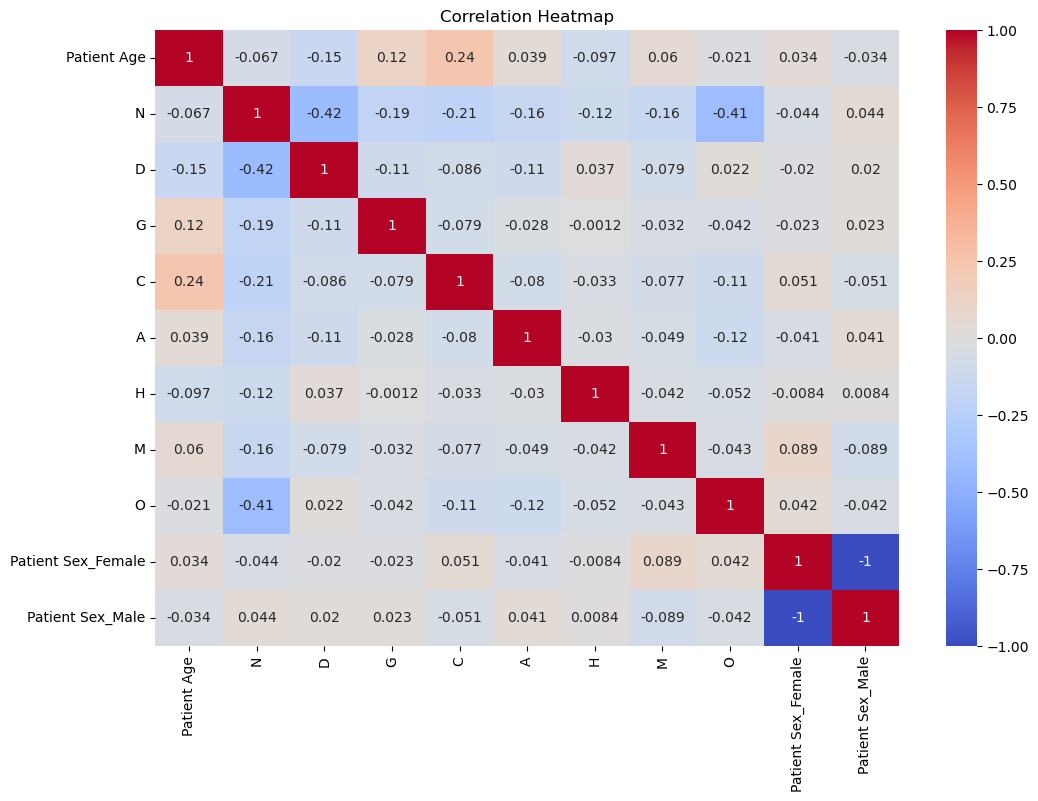

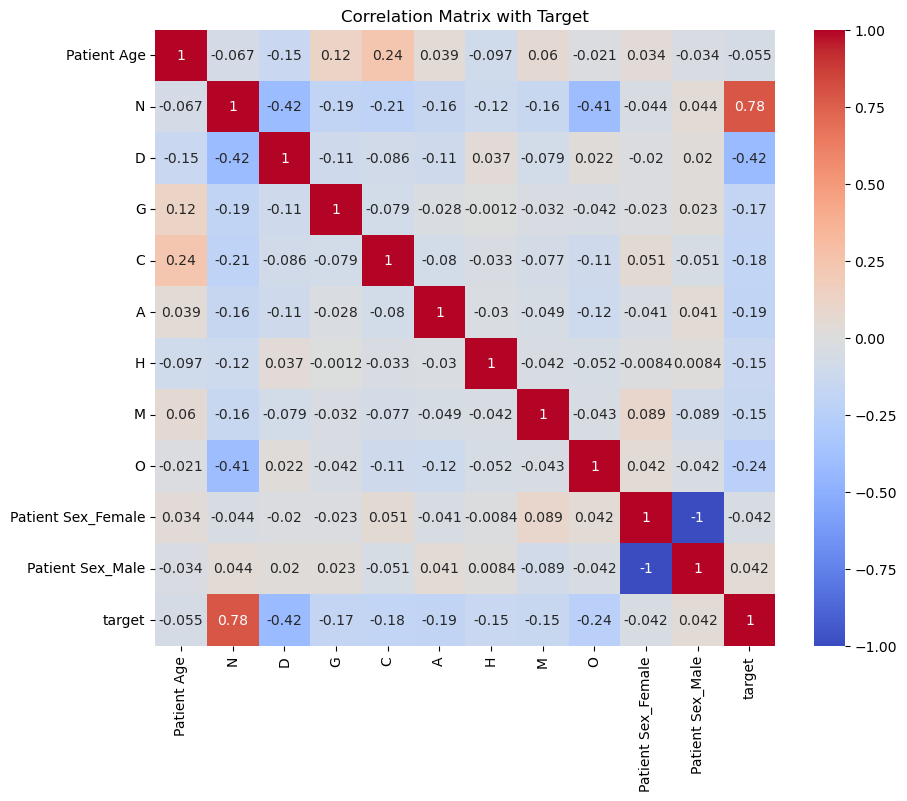

In [33]:
corr = df[numeric_cols].corr()

for col in df.columns:
    print(f"Column: {col}, Unique Values: {df[col].unique()}")

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
plt.figure(figsize=(10, 8))
corr = df[numeric_cols + ['target']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix with Target")
plt.show()

In [34]:
X_chi2 = df[numeric_cols]
y_chi2 = df["target"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_chi2)

chi2_vals, p_vals = chi2(X_scaled, y_chi2)
chi2_df = pd.DataFrame({
    'Feature': X_chi2.columns,
    'Chi2 Score': chi2_vals,
    'P-value': p_vals
}).sort_values(by="Chi2 Score", ascending=False)

print("\nChi-square Test Results:")
print(chi2_df)
X = df[numeric_cols + ['Patient Sex_Female', 'Patient Sex_Male']]
y = df['target']


Chi-square Test Results:
               Feature  Chi2 Score        P-value
1                    N  741.932203  2.278472e-163
2                    D  219.902640   9.497742e-50
8                    O   68.736534   1.125367e-16
5                    A   58.023612   2.589904e-14
4                    C   52.084021   5.317589e-13
3                    G   48.110453   4.028730e-12
7                    M   37.761101   7.996039e-10
6                    H   36.165029   1.812949e-09
10    Patient Sex_Male    1.596432   2.064096e-01
9   Patient Sex_Female    1.451623   2.282678e-01
0          Patient Age    0.755119   3.848603e-01


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Feature Importances:
N                     0.507482
Patient Age           0.174887
D                     0.122390
O                     0.049143
A                     0.038829
G                     0.032987
C                     0.031394
M                     0.021894
H                     0.012916
Patient Sex_Female    0.002520
Patient Sex_Male      0.001914
Patient Sex_Male      0.001877
Patient Sex_Female    0.001767
dtype: float64


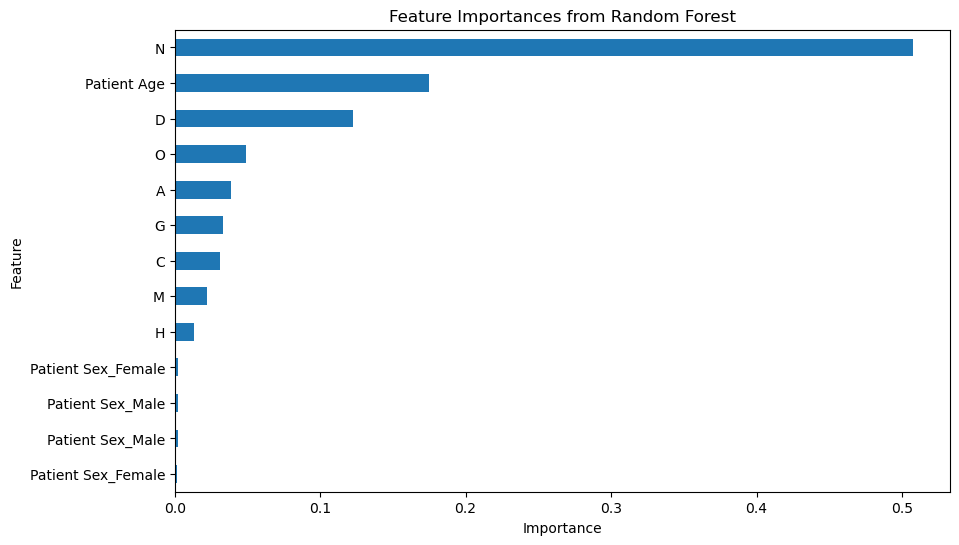

In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nRandom Forest Feature Importances:")
print(importances)

plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

In [37]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       203
           1       0.88      0.77      0.82       143

    accuracy                           0.86       346
   macro avg       0.87      0.85      0.85       346
weighted avg       0.86      0.86      0.86       346



In [38]:
#Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
best_params = {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

# RandomForestClassifier with the optimized parameters
optimized_model = RandomForestClassifier(**best_params, random_state=42)

optimized_model.fit(X_train, y_train)

y_pred = optimized_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       203
           1       0.97      0.74      0.84       143

    accuracy                           0.88       346
   macro avg       0.91      0.86      0.88       346
weighted avg       0.90      0.88      0.88       346



In [40]:
# Train a Gradient Boosting Classifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       203
           1       1.00      0.73      0.84       143

    accuracy                           0.89       346
   macro avg       0.92      0.86      0.88       346
weighted avg       0.91      0.89      0.88       346



In [ ]:
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Train an XGBoost Classifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_array, y_train)  
y_pred_xgb = model_xgb.predict(X_test_array)  

print("XGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       203
           1       0.90      0.77      0.83       143

    accuracy                           0.87       346
   macro avg       0.88      0.86      0.86       346
weighted avg       0.87      0.87      0.87       346

